# Music and the Brain 
---
__Anatomical image__ <br>
- sub-01_ses-01_T1 <br>
_"EchoTime"_ -> TE = 0.0035, <br>
_"RepetitionTime"_ -> TR = 2.53, <br>
<br>
- sub-01_ses-01_T2 <br>
_"EchoTime"_ -> TE = 0.408,, <br>
_"RepetitionTime"_ -> TR = 3.2, <br>


These are the imports that are going to be used throughout this code

In [2]:
import os #to read the directories
import nilearn
from nilearn import plotting
from nilearn import image
from nilearn.plotting import plot_anat, plot_img, plot_stat_map


Anatomical Images

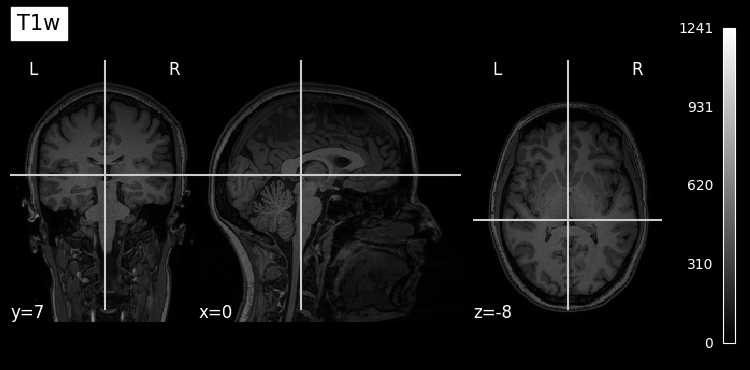

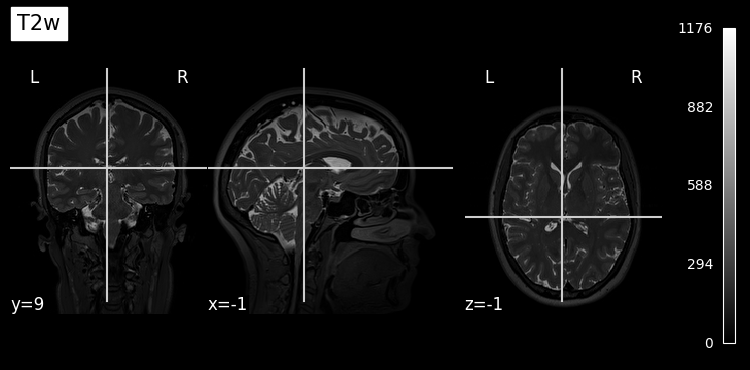

In [3]:

# The r before the string tells Python to treat the string as a raw string, 
# so it interprets the backslashes as literal characters rather than escape characters.
Directory_AnatomicalImage = "../musicAndTheBrain/data/sub-01/ses-01/anat"
file_Anatomical = [file for file in os.listdir(Directory_AnatomicalImage) if file.endswith('.nii.gz')] #they have to be with .nii.gz
file_paths_anat = [os.path.join(Directory_AnatomicalImage, file_name) for file_name in file_Anatomical] # Creates full paths to the files


Directory_fmap = "../musicAndTheBrain/data/sub-01/ses-01/fmap"
file_fmap = [file for file in os.listdir(Directory_fmap) if file.endswith('.nii.gz')]
file_paths_fmap = [os.path.join(Directory_fmap, file_name) for file_name in file_fmap]

# Now you can open the files and use them in your script
for file in file_paths_anat:
    try:
        image_info = file.split('_')[-1].split('.')[0] #Splits between the last _ and the .
        plot_anat(file, title=image_info, colorbar=True, cbar_tick_format="%i")
    except Exception as e:
        print(f"An error occurred while loading the file: {file}")
        print(f"Error: {str(e)}")
        


In [4]:
from nilearn.image import concat_imgs, mean_img
Directory_func = "../musicAndTheBrain/data/sub-01/ses-01/func"
file_func = [file for file in os.listdir(Directory_func) if file.endswith('.nii.gz')]
file_paths_func = [os.path.join(Directory_func, file_name) for file_name in file_func]


__Functional images__ <br>
_"RepetitionTime"_ -> TR = 1, <br>

In [5]:
# Concatenate the functional images
# fmri_img = concat_imgs(file_paths_func)

subject01_runs = {}
for i, file in enumerate(file_paths_func, start=1):
    subject01_runs [i] = file
    print(subject01_runs[i])


../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-1_bold.nii.gz
../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-2_bold.nii.gz
../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-3_bold.nii.gz
../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-4_bold.nii.gz


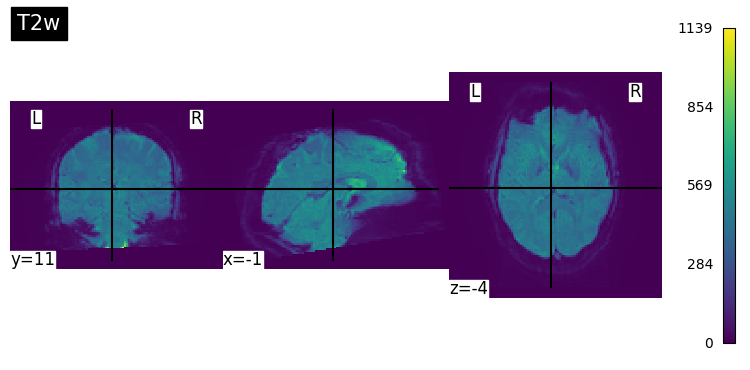

In [6]:
img = subject01_runs[1]
image_func = image.load_img(img)
mean_fmri_img = mean_img(image_func)
plot_img(mean_fmri_img, title=image_info, colorbar=True, cbar_tick_format="%i")

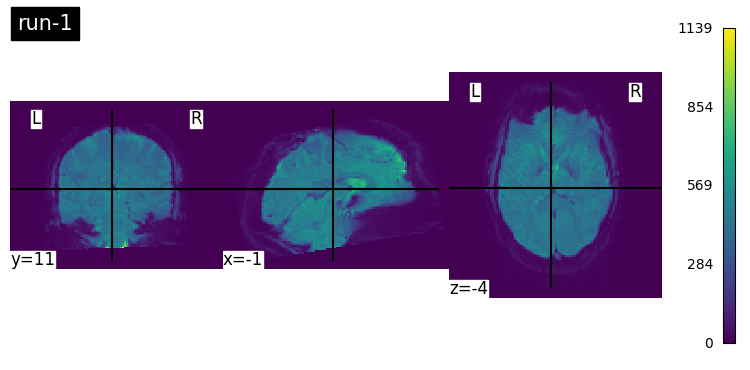

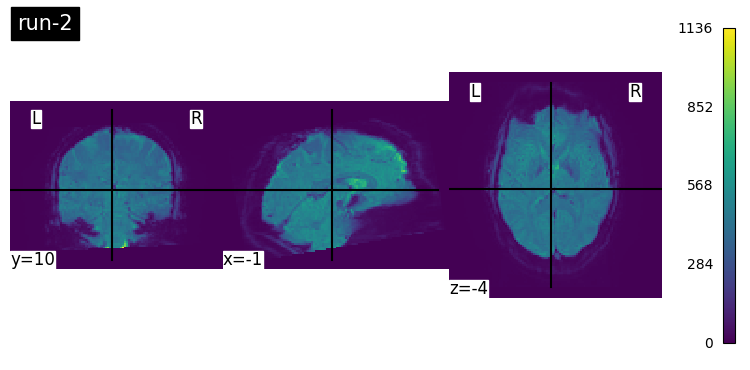

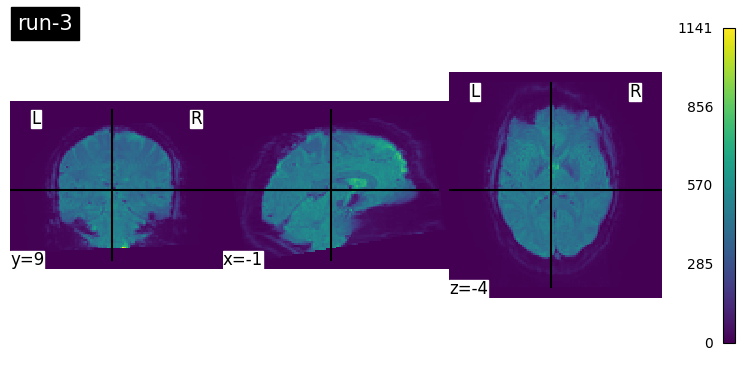

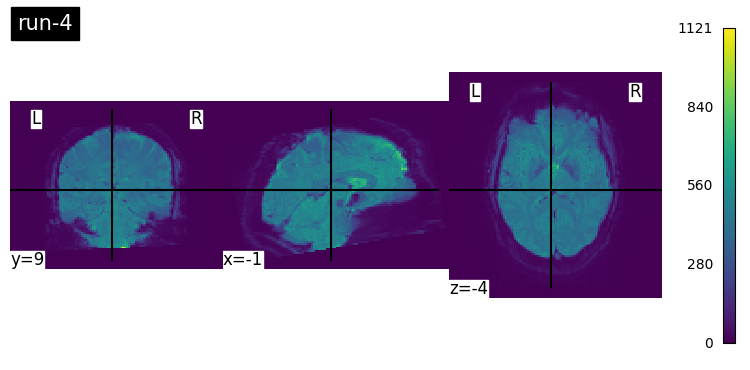

In [7]:
mean_fmri_imgs = {}

for i, file in subject01_runs.items():
    fmri_img = concat_imgs(file)
    
    image_info = file.split('_')[-2].split('.')[0] #Splits between the last _ and the .
    mean_fmri_img = mean_img(fmri_img)
    mean_fmri_imgs[file] = mean_fmri_img
    plot_img(mean_fmri_imgs[file], title=image_info, colorbar=True, cbar_tick_format="%i")



Table

In [8]:
import pandas as pd 
for i, file in mean_fmri_imgs.items():
    

    print(file)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (110, 110, 66)
affine:
[[-1.99716103e+00 -1.39420968e-03 -1.06515996e-01  1.14958969e+02]
 [ 1.66886933e-02  1.97103953e+00 -3.38709891e-01 -8.30593109e+01]
 [-1.05209745e-01  3.39117914e-01  1.96823001e+00 -7.69128571e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 110 110  66   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.         1.9999999  1.9999999  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
ca

In [9]:
Directory_func ="../musicAndTheBrain/data/sub-01/ses-01/func"
file_func_tsv = [file for file in os.listdir(Directory_func) if file.endswith('.tsv')]
file_paths_func_tsv = [os.path.join(Directory_func, file_name) for file_name in file_func_tsv]


In [10]:
subject01_tsv = {}
for i, file in enumerate(file_paths_func_tsv, start=1):
    subject01_tsv [i] = file
    print(subject01_tsv[i])

../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-2_events.tsv
../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-3_events.tsv
../musicAndTheBrain/data/sub-01/ses-01/func\sub-01_ses-01_task-02a_run-4_events.tsv


In [11]:
for i, file in subject01_tsv.items():
    events = pd.read_table(file)
    image_info = os.path.basename(file)
    print()
    print(image_info) #pd.read_table function is used to read a general delimited file into a pandas DataFrame
    print(events) #this would display the DataFrame as a table.


sub-01_ses-01_task-02a_run-2_events.tsv
     onset  duration        trial_type
0     0.00     12.26             Noise
1    12.26     23.98     Transcendence
2    36.24      6.01             Noise
3    42.25     24.00     Transcendence
4    66.25     17.99             Noise
5    84.24     24.05           Sadness
6   108.29      5.98             Noise
7   114.26     24.00           Sadness
8   138.26     18.03             Noise
9   156.30     23.98           Tension
10  180.28      6.01             Noise
11  186.29     23.96           Tension
12  210.26     18.03             Noise
13  228.28     23.98  JoyfulActivation
14  252.26      6.02             Noise
15  258.28     24.00  JoyfulActivation
16  282.28     18.03             Noise
17  300.31     23.94             Power
18  324.25      6.01             Noise
19  330.27     24.00             Power
20  354.27     17.98             Noise
21  372.25     24.08        Tenderness
22  396.33      5.94             Noise
23  402.27     24.30   

# Creation of the vectors of Emotion (1) and Noise (0)


In [40]:
labels = ["Noise", "JoyfulActivation", "Nostalgia", "Peacefulness", "Power", "Sadness", "Tenderness", "Tension", "Transcendence", "Wonder"]
label_to_int = {label: idx for idx, label in enumerate(labels)}
print(label_to_int)

{'Noise': 0, 'JoyfulActivation': 1, 'Nostalgia': 2, 'Peacefulness': 3, 'Power': 4, 'Sadness': 5, 'Tenderness': 6, 'Tension': 7, 'Transcendence': 8, 'Wonder': 9}


In [13]:
import numpy as np

merged_events_dictionary={}
number = 0
merged_vectors_dictionary = {}

for i, file in subject01_tsv.items():
    events = pd.read_table(file)
    # print (events.shape)
    trial_type_column = events.iloc[:, -1]
    #print(last_column)
    is_noise = trial_type_column == 'Noise'
    noise_events = events[(trial_type_column == 'Noise') & (events['duration'] > 10)]
    emotion_events = events[(trial_type_column !='Noise')]
    merged_events = pd.concat([noise_events, emotion_events]).sort_index()

    
    merged_events.index = range(len(merged_events))

   
    # Update the merged_events DataFrame
   

    merged_events_dictionary[i] = merged_events
    
    last_merged_column =  merged_events.iloc[:, -1]
    
    merged_vector = merged_events['trial_type'].map(label_to_int).values
    
    #print(noise_events)
    #print(emotion_events)
    print(merged_events)
    print(merged_vector)
    
    merged_vectors_dictionary [i] = merged_vector
    # print(is_noise)
    noise_events_test = merged_events[merged_events['trial_type'] == 'Noise']


     onset  duration        trial_type
0     0.00     12.26             Noise
1    12.26     23.98     Transcendence
2    42.25     24.00     Transcendence
3    66.25     17.99             Noise
4    84.24     24.05           Sadness
5   114.26     24.00           Sadness
6   138.26     18.03             Noise
7   156.30     23.98           Tension
8   186.29     23.96           Tension
9   210.26     18.03             Noise
10  228.28     23.98  JoyfulActivation
11  258.28     24.00  JoyfulActivation
12  282.28     18.03             Noise
13  300.31     23.94             Power
14  330.27     24.00             Power
15  354.27     17.98             Noise
16  372.25     24.08        Tenderness
17  402.27     24.30        Tenderness
18  426.56     17.86             Noise
19  444.42     24.00            Wonder
20  474.44     24.06            Wonder
21  498.50     17.96             Noise
22  516.45     23.98         Nostalgia
23  546.43     24.01         Nostalgia
24  570.44     17.98     

## Creation of the Emotions fmri image and Noise image

In [14]:
# import numpy as np
# from nilearn.image import concat_imgs, mean_img, index_img
# from nilearn.plotting import plot_img

# # Define parameters
# TR = 1
# img_test = subject01_runs[2]
# events = merged_events_dictionary[1]
# last_column =  events.iloc[:, -2]

# name_index ={}
# time_index ={}

# for j in last_column:
#     name_index[j] = {}
#     time_index[j] = {}
    
#     # Convert j to integer
#     j_int = int(j)
    
#     # Process images in batches
#     for k in range(0, j_int, TR):
#         time_key = f"time_column-{j}_index-{k}"
#         name_index[j][k] = time_key
        
#         # Load and process images in batches
#         img_batch = [index_img(img_test, idx) for idx in range(k, min(j_int, k + TR), TR)]
#         concat_batch = concat_imgs(img_batch)
        
#         # Calculate mean image for the batch
#         mean_fmri_img_batch = mean_img(concat_batch)
        
#         # Plot the mean image
#         plot_img(mean_fmri_img_batch, title=image_info, colorbar=True, cbar_tick_format="%i")

# # Print name_index for debugging
#     print(name_index[j])


In [15]:
#Começar a fazer daqui para a frente.
img_test_run02 = subject01_runs[2]


events = merged_events_dictionary[1]
row_events = events.iterrows()
time_index ={}


TR=1

# Empty dictionary to store the images
block_4d_img_dictionary = {}
output_mean_img_sub01_run02 = {}

image_func = image.load_img(img_test_run02)

for index, row in row_events:
    time_index [index] = {}

    onset = int(row['onset'])

    duration = int (row['duration'])
    
    trial_type = row['trial_type']

    print(f'onset: {onset}, duration: {duration}, trial_type: {trial_type}')
    
    # images from indexes in interval onset to onset + duration

    block_4d_img = image.index_img(image_func, slice(onset, onset + duration))
    
    
    block_4d_img_dictionary[index] = block_4d_img

    mean_block_4d_img = mean_img(block_4d_img)
    
    # Append the mean image to the dictionary
    output_mean_img_sub01_run02[index] = mean_block_4d_img



#
# concat_4D_img = concat_imgs(block_4d_img_dictionary.values())


onset: 0, duration: 12, trial_type: Noise
onset: 12, duration: 23, trial_type: Transcendence
onset: 42, duration: 24, trial_type: Transcendence
onset: 66, duration: 17, trial_type: Noise
onset: 84, duration: 24, trial_type: Sadness
onset: 114, duration: 24, trial_type: Sadness
onset: 138, duration: 18, trial_type: Noise
onset: 156, duration: 23, trial_type: Tension
onset: 186, duration: 23, trial_type: Tension
onset: 210, duration: 18, trial_type: Noise
onset: 228, duration: 23, trial_type: JoyfulActivation
onset: 258, duration: 24, trial_type: JoyfulActivation
onset: 282, duration: 18, trial_type: Noise
onset: 300, duration: 23, trial_type: Power
onset: 330, duration: 24, trial_type: Power
onset: 354, duration: 17, trial_type: Noise
onset: 372, duration: 24, trial_type: Tenderness
onset: 402, duration: 24, trial_type: Tenderness
onset: 426, duration: 17, trial_type: Noise
onset: 444, duration: 24, trial_type: Wonder
onset: 474, duration: 24, trial_type: Wonder
onset: 498, duration: 17

In [16]:
print(output_mean_img_sub01_run02.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])


### Creation of the Indeces' mean Images

In [17]:
# for index, image in output_mean_img_sub01_run02.items():
#     #print(f"Image {index}")
    
#     plot_img(image, title=index, colorbar=True, cbar_tick_format="%i")
    

In [18]:
img_test_run03 = subject01_runs[3]


events = merged_events_dictionary[2]
row_events = events.iterrows()
time_index ={}

TR=1

# Empty dictionary to store the images
block_4d_img_dictionary_run03 = {}
output_mean_img_sub01_run03 = {}
image_func_run03 = image.load_img(img_test_run03)

for index, row in row_events:
    time_index [index] = {}

    onset = int(row['onset'])

    duration = int (row['duration'])
    
    trial_type = row['trial_type']

    print(f'onset: {onset}, duration: {duration}, trial_type: {trial_type}')
    
    # images from indexes in interval onset to onset + duration

    block_4d_img_run03 = image.index_img(image_func_run03, slice(onset, onset + duration))
    
    block_4d_img_dictionary_run03[index] = block_4d_img_run03

    mean_block_4d_img = mean_img(block_4d_img_run03)
    
    # Append the mean image to the dictionary
    output_mean_img_sub01_run03[index] = mean_block_4d_img



onset: 0, duration: 12, trial_type: Noise
onset: 12, duration: 24, trial_type: Sadness
onset: 42, duration: 24, trial_type: Sadness
onset: 66, duration: 17, trial_type: Noise
onset: 84, duration: 24, trial_type: JoyfulActivation
onset: 114, duration: 23, trial_type: JoyfulActivation
onset: 138, duration: 18, trial_type: Noise
onset: 156, duration: 24, trial_type: Tenderness
onset: 186, duration: 24, trial_type: Tenderness
onset: 210, duration: 18, trial_type: Noise
onset: 228, duration: 23, trial_type: Tension
onset: 258, duration: 23, trial_type: Tension
onset: 282, duration: 18, trial_type: Noise
onset: 300, duration: 23, trial_type: Power
onset: 330, duration: 24, trial_type: Power
onset: 354, duration: 18, trial_type: Noise
onset: 372, duration: 23, trial_type: Nostalgia
onset: 402, duration: 24, trial_type: Nostalgia
onset: 426, duration: 17, trial_type: Noise
onset: 444, duration: 24, trial_type: Wonder
onset: 474, duration: 24, trial_type: Wonder
onset: 498, duration: 17, trial_

In [19]:
img_test_run04 = subject01_runs[4]


events = merged_events_dictionary[3]
row_events = events.iterrows()
time_index ={}

TR=1

# Empty dictionary to store the images
block_4d_img_dictionary_run04 = {}
output_mean_img_sub01_run04 = {}
image_func_run04 = image.load_img(img_test_run04)

for index, row in row_events:
    time_index [index] = {}

    onset = int(row['onset'])

    duration = int (row['duration'])
    
    trial_type = row['trial_type']

    print(f'onset: {onset}, duration: {duration}, trial_type: {trial_type}')
    
    # images from indexes in interval onset to onset + duration

    block_4d_img_run04 = image.index_img(image_func_run04, slice(onset, onset + duration))
    
    block_4d_img_dictionary_run04 [index] = block_4d_img_run04

    mean_block_4d_img = mean_img(block_4d_img_run04)
    
    # Append the mean image to the dictionary
    output_mean_img_sub01_run04[index] = mean_block_4d_img


onset: 0, duration: 12, trial_type: Noise
onset: 12, duration: 24, trial_type: Sadness
onset: 42, duration: 23, trial_type: Sadness
onset: 66, duration: 18, trial_type: Noise
onset: 84, duration: 24, trial_type: Peacefulness
onset: 114, duration: 24, trial_type: Peacefulness
onset: 138, duration: 17, trial_type: Noise
onset: 156, duration: 24, trial_type: Transcendence
onset: 186, duration: 24, trial_type: Transcendence
onset: 210, duration: 17, trial_type: Noise
onset: 228, duration: 23, trial_type: Tenderness
onset: 258, duration: 23, trial_type: Tenderness
onset: 282, duration: 18, trial_type: Noise
onset: 300, duration: 24, trial_type: Wonder
onset: 330, duration: 24, trial_type: Wonder
onset: 354, duration: 18, trial_type: Noise
onset: 372, duration: 23, trial_type: JoyfulActivation
onset: 402, duration: 24, trial_type: JoyfulActivation
onset: 426, duration: 17, trial_type: Noise
onset: 444, duration: 24, trial_type: Power
onset: 474, duration: 24, trial_type: Power
onset: 498, du

In [20]:
values = np.repeat([1, 2, 3], 28)

# Reshape the array to have 84 rows and 1 column
run_label= values.flatten()

print(run_label.shape)



(84,)


In [21]:
print(run_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3]


## Masking the runs


In [56]:
from nilearn.maskers import NiftiMasker
from nilearn.image import smooth_img
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

from nilearn.decoding import Decoder
# “background”: Use this option if your images present a clear homogeneous background.
#“whole-brain-template”: This will extract the whole-brain part of your data by resampling 
# the MNI152 brain mask for your data’s field of view.


logo = LeaveOneGroupOut()


decoder_dummy_background = Decoder(estimator='dummy_classifier', cv = logo, smoothing_fwhm=6, mask_strategy='background', verbose = 0, )
decoder_dummy_whole_brain = Decoder(estimator='dummy_classifier', cv = logo, smoothing_fwhm=6,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_dummy_gm = Decoder(estimator='dummy_classifier', cv = logo, smoothing_fwhm=6, mask_strategy='gm-template' , verbose = 0)

decoder_svcL1_background = Decoder(estimator='svc_l1', cv = logo, smoothing_fwhm=6, mask_strategy='background', verbose = 0)
decoder_svcL1_whole_brain = Decoder(estimator='svc_l1', cv = logo, smoothing_fwhm=6,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_svcL1_gm = Decoder(estimator='svc_l1', cv = logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose = 0)

decoder_svcL2_background = Decoder(estimator='svc_l2', cv = logo, smoothing_fwhm=6, mask_strategy='background', verbose = 0)
decoder_svcL2_whole_brain = Decoder(estimator='svc_l2', cv = logo, smoothing_fwhm=6,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_svcL2_gm = Decoder(estimator='svc_l2', cv = logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose =0 )

decoder_LogisticL1_background = Decoder(estimator='logistic_l1', cv = logo, smoothing_fwhm=6, mask_strategy='background', verbose = 0)
decoder_LogisticL1_whole_brain = Decoder(estimator='logistic_l1', cv = logo, smoothing_fwhm=6,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_LogisticL1_gm = Decoder(estimator='logistic_l1', cv = logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose = 0)

decoder_LogisticL2_background = Decoder(estimator='logistic_l2', cv = logo, smoothing_fwhm=6, mask_strategy='background', verbose = 0)
decoder_LogisticL2_whole_brain = Decoder(estimator='logistic_l2', cv = logo, smoothing_fwhm=6,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_LogisticL2_gm = Decoder(estimator='logistic_l2', cv = logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose = 0)

decoder_ridgeregressor_background = Decoder(estimator='ridge_regressor', cv = logo, smoothing_fwhm=6, mask_strategy='background', verbose = 0)
decoder_ridgeregressor_whole_brain = Decoder(estimator='ridge_regressor', cv = logo, smoothing_fwhm=6,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_ridgeregressor_gm = Decoder(estimator='ridge_regressor', cv = logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose = 0)







In [23]:
X = concat_imgs([output_mean_img_sub01_run02.values(), output_mean_img_sub01_run03.values(), output_mean_img_sub01_run04.values()])
 # Combine the labels
y = np.concatenate([merged_vectors_dictionary[1], merged_vectors_dictionary[2], merged_vectors_dictionary[3]])  # Assuming you have a vector of labels concatenated across all runs


In [24]:
print(X.shape)
print(y)

(110, 110, 66, 84)
[0 8 8 0 5 5 0 7 7 0 1 1 0 4 4 0 6 6 0 9 9 0 2 2 0 3 3 0 0 5 5 0 1 1 0 6 6
 0 7 7 0 4 4 0 2 2 0 9 9 0 3 3 0 8 8 0 0 5 5 0 3 3 0 8 8 0 6 6 0 9 9 0 1 1
 0 4 4 0 2 2 0 7 7 0]


In [71]:
import time
cv_dictionary = {}

t0 = time.time()
decoder_ridgeregressor_gm.fit(X, y, run_label)
cv_dictionary["decoder_ridgeregressor_gm"]={"score":decoder_ridgeregressor_gm.cv_scores_}

scores = cv_dictionary["decoder_ridgeregressor_gm"]["score"]

print(f"{'decoder_ridgeregressor_gm':10}: {time.time() - t0:.2f}s")
for category in labels:
    category_idx = label_to_int[category]
    
    # Use the integer index to access the scores
    mean = np.mean(cv_dictionary['decoder_ridgeregressor_gm']['score'][category_idx])
    std = np.std(cv_dictionary['decoder_ridgeregressor_gm']['score'][category_idx])
    print(f"    {category:10} vs all -- AUC: {mean:1.2f} +- {std:1.2f}")

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\decoding\decoder.py:320: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


decoder_ridgeregressor_gm: 8.82s
    Noise      vs all -- AUC: 0.80 +- 0.07
    JoyfulActivation vs all -- AUC: 0.54 +- 0.16
    Nostalgia  vs all -- AUC: 0.40 +- 0.20
    Peacefulness vs all -- AUC: 0.51 +- 0.19
    Power      vs all -- AUC: 0.85 +- 0.11
    Sadness    vs all -- AUC: 0.87 +- 0.04
    Tenderness vs all -- AUC: 0.64 +- 0.32
    Tension    vs all -- AUC: 0.40 +- 0.03
    Transcendence vs all -- AUC: 0.22 +- 0.12
    Wonder     vs all -- AUC: 0.76 +- 0.02


In [70]:
print(label_to_int)
print(cv_dictionary['decoder_ridgeregressor_gm']['score'].keys())

{'Noise': 0, 'JoyfulActivation': 1, 'Nostalgia': 2, 'Peacefulness': 3, 'Power': 4, 'Sadness': 5, 'Tenderness': 6, 'Tension': 7, 'Transcendence': 8, 'Wonder': 9}
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


NameError: name 'classifiers' is not defined

In [40]:
import time

classifiers = [
    decoder_dummy_gm,
    decoder_svcL1_gm,
    decoder_svcL2_gm,
    decoder_LogisticL1_gm,
    decoder_LogisticL2_gm,
    decoder_ridgeregressor_gm
]

# Nomes dos classificadores para exibição
classifier_names = [
    "decoder_dummy_gm",
    "decoder_svcL1_gm",
    "decoder_svcL2_gm",
    "decoder_LogisticL1_gm",
    "decoder_LogisticL2_gm",
    "decoder_ridgeregressor_gm"
]

predictions = {}
cv_dictionary = {}

# Ajuste, predição e cálculo da acurácia para cada classificador
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X, y, run_label)
    y_pred = classifier.predict(X)
    t0 = time.time()

    
    cv_dictionary[name] = classifier.cv_scores_
    

    scores = cv_dictionary[name]["score"]

    predictions[name] = y_pred
    accuracy = (y_pred == y).mean() * 100.0
    print(f"{name} classification accuracy: {accuracy:g}%")

    print(f"{name:14}: {time.time() - t0:.2f}s")

    for category in labels:
        category_idx = label_to_int[category]
    
        # Use the integer index to access the scores
        mean = np.mean(cv_dictionary['decoder_ridgeregressor_gm']['score'][category_idx])
        std = np.std(cv_dictionary['decoder_ridgeregressor_gm']['score'][category_idx])
        print(f"    {category:10} vs all -- AUC: {mean:1.2f} +- {std:1.2f}")

    scores = classifiers_data[classifier_name]["score"]
    scores["AVERAGE"] = np.mean(list(scores.values()), axis=0)
    classifiers_data[classifier_name]["score"] = scores

    
    
    

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\decoding\decoder.py:320: UserWarning: Use a custom estimator at your own risk of the process not working as intended.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std

decoder_dummy_gm classification accuracy: 21.4286%


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to

decoder_svcL1_gm classification accuracy: 100%


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas

decoder_svcL2_gm classification accuracy: 100%


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selectio

decoder_LogisticL1_gm classification accuracy: 41.6667%


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selectio

decoder_LogisticL2_gm classification accuracy: 48.8095%


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


decoder_ridgeregressor_gm classification accuracy: 88.0952%


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


TypeError: unhashable type: 'dict'

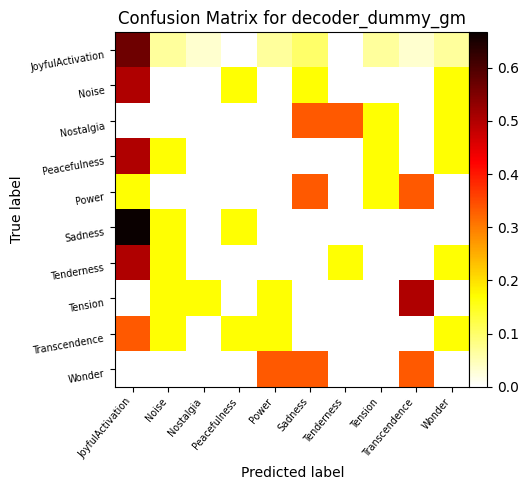

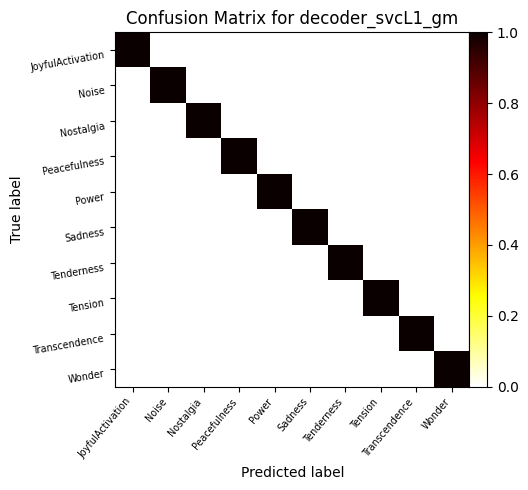

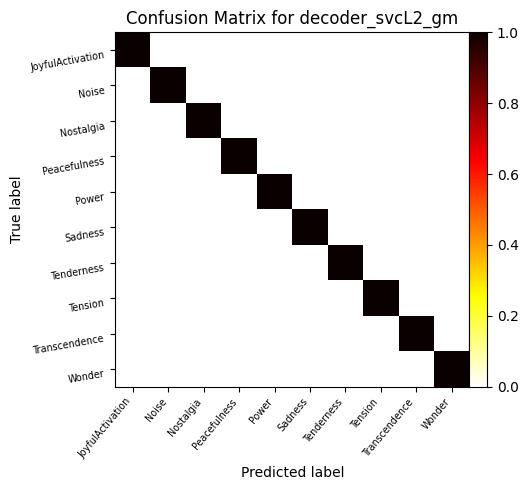

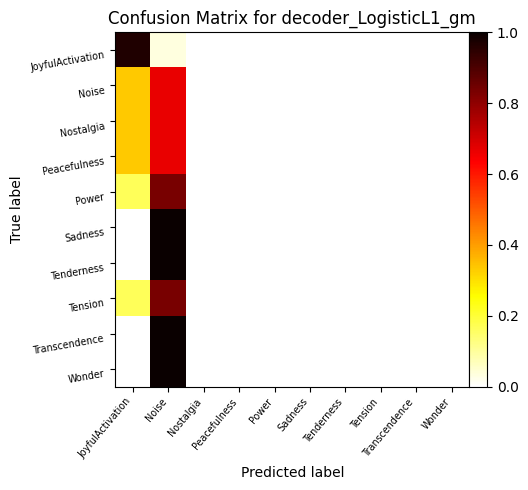

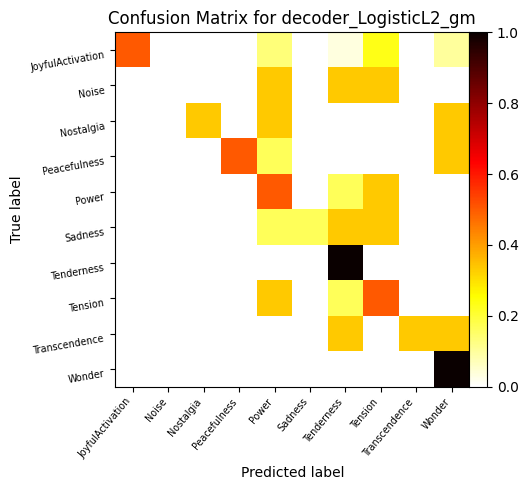

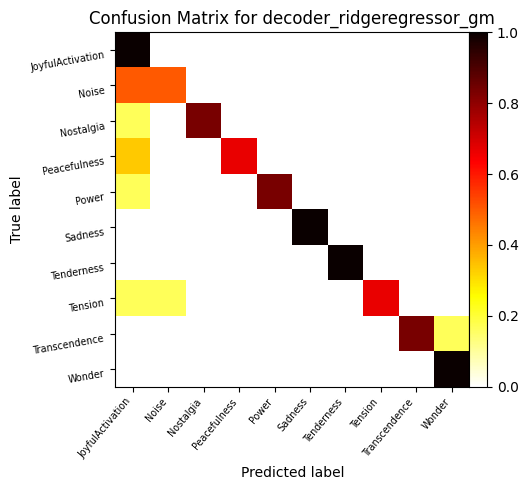

In [39]:
from sklearn.metrics import confusion_matrix

for name in classifier_names:
    y_pred = predictions[name]
    
    # Calcular a matriz de confusão
    matrix = confusion_matrix(y, y_pred, normalize="true")
    
    # Plotar a matriz de confusão
    im = plotting.plot_matrix(
        matrix,
        labels=sorted(np.unique(labels)),
        vmin=0,
        cmap="hot_r",
    )
    
    # Adicionar rótulos aos eixos x/y
    ax = im.axes
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_title(f"Confusion Matrix for {name}")
    
    # Ajustar a figura para que os rótulos se encaixem
    ax.get_figure().tight_layout()
    
    # Exibir a matriz de confusão
    plotting.show()

KeyError: Decoder(cv=LeaveOneGroupOut(),
        estimator=DummyClassifier(random_state=0, strategy='stratified'),
        mask_strategy='gm-template', memory=Memory(location=None),
        smoothing_fwhm=6)

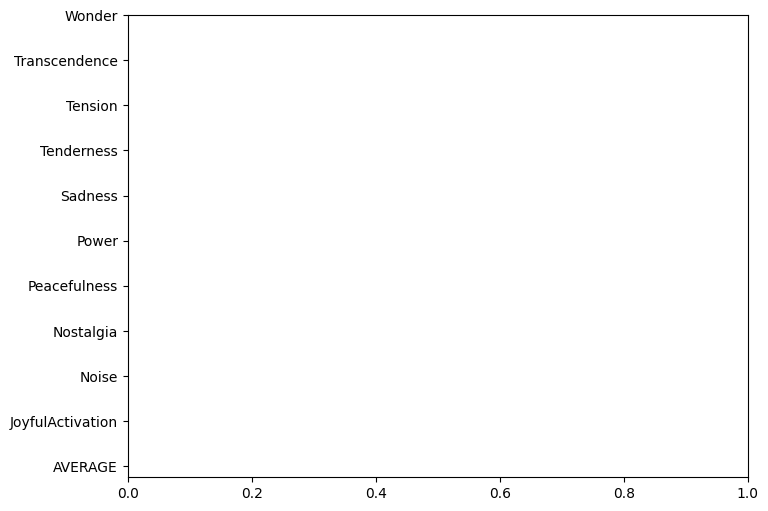

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

all_categories = np.sort(np.hstack([labels, "AVERAGE"]))
tick_position = np.arange(len(all_categories))
plt.yticks(tick_position + 0.25, all_categories)
height = 0.1

for color, classifier_name in zip(["b", "m", "k", "r", "g"], classifiers):
    score_means = [
        np.mean(cv_dict[classifier_name]["score"][category])
        for category in all_categories
    ]

    plt.barh(
        tick_position,
        score_means,
        label=classifier_name.replace("_", " "),
        height=height,
        color=color,
    )
    tick_position = tick_position + height

plt.xlabel("Classification accuracy (AUC score)")
plt.ylabel("Visual stimuli category")
plt.xlim(xmin=0.5)
plt.legend(ncol=1, bbox_to_anchor=(1.3, 0.2))
plt.title(
    "Category-specific classification accuracy for different classifiers"
)
plt.tight_layout()

In [31]:
from nilearn.decoding import FREMClassifier

frem_dummy_background = FREMClassifier(estimator='dummy_classifier', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_dummy_whole_brain = FREMClassifier(estimator='dummy_classifier', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_dummy_gm = FREMClassifier(estimator='dummy_classifier', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_svcL1_background = FREMClassifier(estimator='svc_l1', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_svcL1_whole_brain = FREMClassifier(estimator='svc_l1', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_svcL1_gm = FREMClassifier(estimator='svc_l1', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_svcL2_background = FREMClassifier(estimator='svc_l2', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_svcL2_whole_brain = FREMClassifier(estimator='svc_l2', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_svcL2_gm = FREMClassifier(estimator='svc_l2', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_LogisticL1_background = FREMClassifier(estimator='logistic_l1', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_LogisticL1_whole_brain = FREMClassifier(estimator='logistic_l1', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_LogisticL1_gm = FREMClassifier(estimator='logistic_l1', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_LogisticL2_background = FREMClassifier(estimator='logistic_l2', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_LogisticL2_whole_brain = FREMClassifier(estimator='logistic_l2', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_LogisticL2_gm = FREMClassifier(estimator='logistic_l2', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_ridgeregressor_background = FREMClassifier(estimator='ridge_regressor', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_ridgeregressor_whole_brain = FREMClassifier(estimator='ridge_regressor', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_ridgeregressor_gm = FREMClassifier(estimator='ridge_regressor', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

In [35]:
# # Lista de classificadores
# classifiers = [
#     frem_dummy_gm,
#     frem_svcL1_gm,
#     frem_svcL2_gm,
#     frem_LogisticL1_gm,
#     frem_LogisticL2_gm,
#     frem_ridgeregressor_gm
# ]

# # Nomes dos classificadores para exibição
# classifier_names = [
#     "frem_dummy_gm",
#     "frem_svcL1_gm",
#     "frem_svcL2_gm",
#     "frem_LogisticL1_gm",
#     "frem_LogisticL2_gm",
#     "frem_ridgeregressor_gm"
# ]

# predictions = {}

# # Ajuste, predição e cálculo da acurácia para cada classificador
# for classifier, name in zip(classifiers, classifier_names):
#     classifier.fit(X, y, run_label)
#     y_pred = classifier.predict(X)
#     predictions[name] = y_pred
#     accuracy = (y_pred == y).mean() * 100.0
    
#     print(f"{name} classification accuracy: {accuracy:g}%")

## hoosing the right predictive model for neuroimaging
### Classification: two classes or multi-class
One versus One:

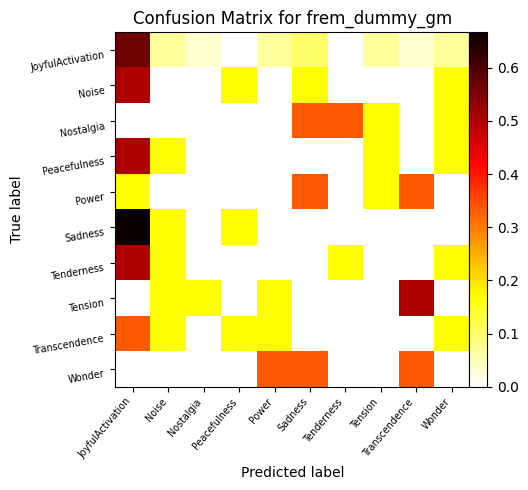

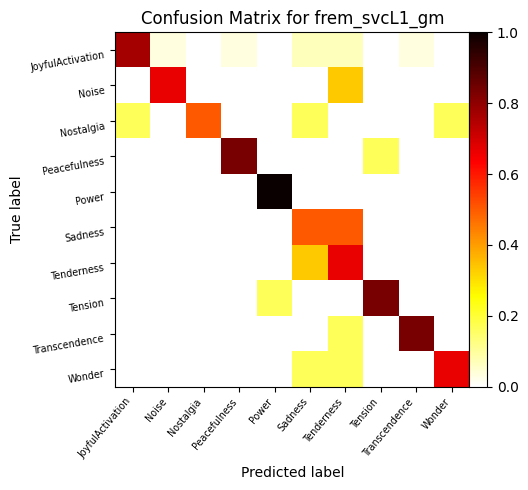

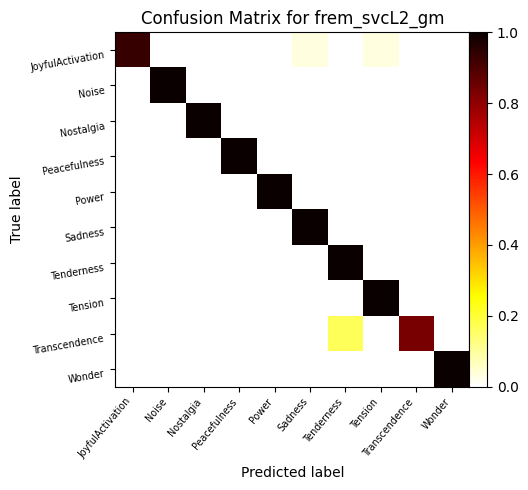

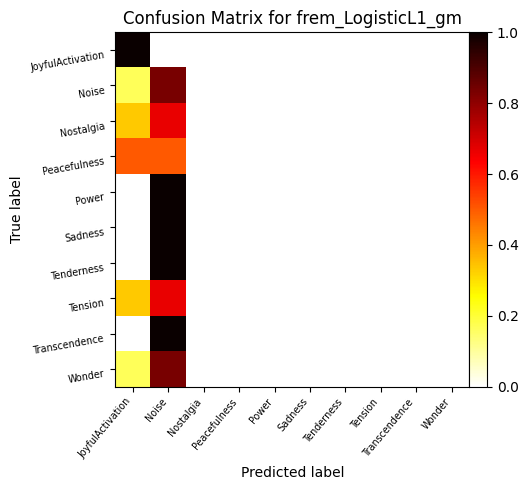

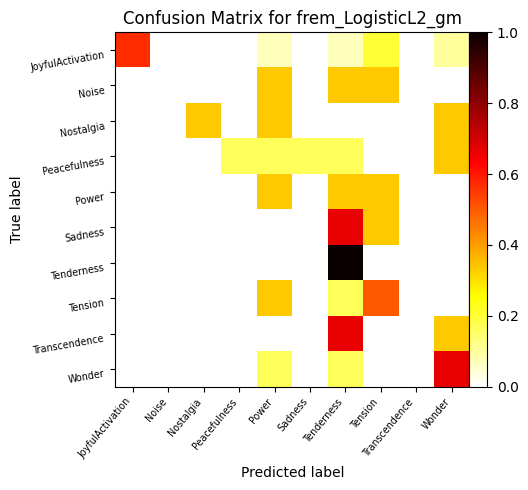

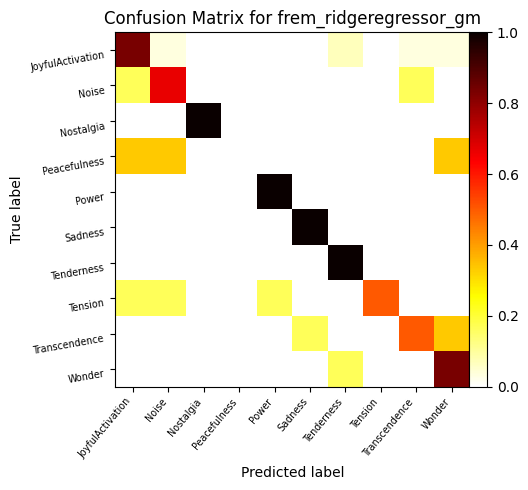

In [38]:
from sklearn.metrics import confusion_matrix

for name in classifier_names:
    y_pred = predictions[name]
    
    # Calcular a matriz de confusão
    matrix = confusion_matrix(y, y_pred, normalize="true")
    
    # Plotar a matriz de confusão
    im = plotting.plot_matrix(
        matrix,
        labels=sorted(np.unique(labels)),
        vmin=0,
        cmap="hot_r",
    )
    
    # Adicionar rótulos aos eixos x/y
    ax = im.axes
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_title(f"Confusion Matrix for {name}")
    
    # Ajustar a figura para que os rótulos se encaixem
    ax.get_figure().tight_layout()
    
    # Exibir a matriz de confusão
    plotting.show()

# Decoding and MVPA: predicting from brain images

## Decoding Analysis

### Estimators
We need to use SVM's (support vector machines).
They can be _SVC_, _NuSVC_ and _LinearSVC_ !
<br>
[image.png](attachment:image.png)
<br>
We are going to use Linear Regression with L1 Regularization


### Cross validation Methods <br>
sklearn.model_selection.cross_val_score <br>
sklearn.model_selection.LeaveOneGroupOut


## Experimenting with a mask

In [29]:
#compute a whole-brain, grey-matter or white-matter mask using the MNI template: nilearn.masking.compute_brain_mask.
import scipy
#compute a mask from images with a flat background: nilearn.masking.compute_background_mask

smooth_train = nilearn.image.smooth_img(training_runs, fwhm=6) #smooth the images with a gaussian filter
smooth_test = nilearn.image.smooth_img(testing_run.values(), fwhm=6)


NameError: name 'training_runs' is not defined